In [ ]:
import tensorflow as tf
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D , MaxPool2D
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.mobilenet_v3 import MobileNetV3
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from glob import glob
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
Train_data="/content/drive/MyDrive/Mung_Bean_Dataset/train"
Test_data="/content/drive/MyDrive/Mung_Bean_Dataset/test"
len(Test_data)

45

In [ ]:
vgg_model =Sequential()
vgg=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling="avg",
    classes=11,
    classifier_activation="softmax",
)

In [ ]:
for layer in vgg.layers:
  layer.tarinable=False

In [ ]:
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(553 , activation="relu"))
vgg_model.add(Dense(1, activation="softmax"))

In [ ]:
#x=Flatten()(vgg.output)

In [ ]:
'''prediction =Dense(11 , activation="softmax")(x)

Boss =Model(inputs=vgg.input , outputs=prediction)'''

'prediction =Dense(11 , activation="softmax")(x)\n\nBoss =Model(inputs=vgg.input , outputs=prediction)'

In [ ]:
vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 553)               283689    
                                                                 
 dense_10 (Dense)            (None, 1)                 554       
                                                                 
Total params: 14,998,931
Trainable params: 14,998,931
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Train_gen =ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=0.4)

In [ ]:
Test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_data_gen=Train_gen.flow_from_directory(Train_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 171 images belonging to 11 classes.


In [ ]:
Test_data_gen=Test_gen.flow_from_directory(Test_data,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

Found 54 images belonging to 11 classes.


In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'Aphids': 0, 'Bruchids': 1, 'Cercospora leaf spot': 2, 'Charcoal rot': 3, 'Fusarium wilt _ Root rot': 4, 'Halo Blight': 5, 'Healthy Plants': 6, 'Powdery Mildew': 7, 'Stem fly': 8, 'White fly': 9, 'Yellow Mosaic': 10}


In [ ]:
li = list(class_names.keys())
print(li)

['Aphids', 'Bruchids', 'Cercospora leaf spot', 'Charcoal rot', 'Fusarium wilt _ Root rot', 'Halo Blight', 'Healthy Plants', 'Powdery Mildew', 'Stem fly', 'White fly', 'Yellow Mosaic']


In [ ]:
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                     loss="binary_crossentropy",
                     metrics=([tf.keras.metrics.Accuracy(),
                              tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall()]))

In [ ]:
Best=vgg_model.fit(Train_data_gen,
               epochs=20,
               verbose=1,
               validation_data=Test_data_gen)

Epoch 1/20
6/6 [==============================] - 20s 2s/step - loss: -3.7365 - accuracy: 0.0526 - precision_9: 0.8713 - recall_9: 1.0000 - val_loss: -7.7884 - val_accuracy: 0.0741 - val_precision_9: 0.8704 - val_recall_9: 1.0000
Epoch 2/20
6/6 [==============================] - 9s 2s/step - loss: -11.2287 - accuracy: 0.0526 - precision_9: 0.8713 - recall_9: 1.0000 - val_loss: -19.0278 - val_accuracy: 0.0741 - val_precision_9: 0.8704 - val_recall_9: 1.0000
Epoch 3/20
6/6 [==============================] - 10s 1s/step - loss: -26.9032 - accuracy: 0.0526 - precision_9: 0.8713 - recall_9: 1.0000 - val_loss: -46.5034 - val_accuracy: 0.0741 - val_precision_9: 0.8704 - val_recall_9: 1.0000
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: -65.8467 - accuracy: 0.0526 - precision_9: 0.8713 - recall_9: 1.0000 - val_loss: -129.1165 - val_accuracy: 0.0741 - val_precision_9: 0.8704 - val_recall_9: 1.0000
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: -213

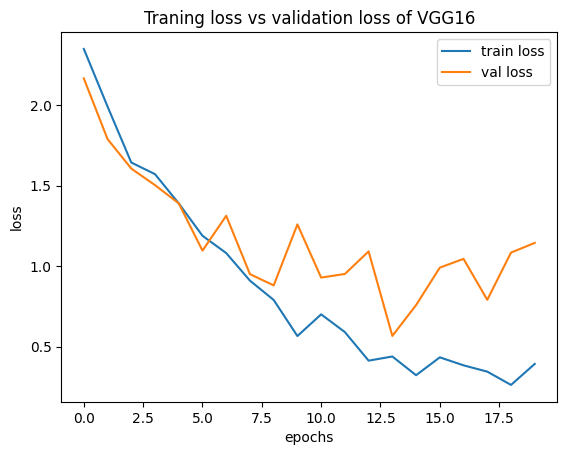

In [ ]:
plt.plot(Best.history['loss'], label='train loss')
plt.plot(Best.history['val_loss'], label='val loss')
plt.title("Traning loss vs validation loss of VGG16")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# plot the accuracy

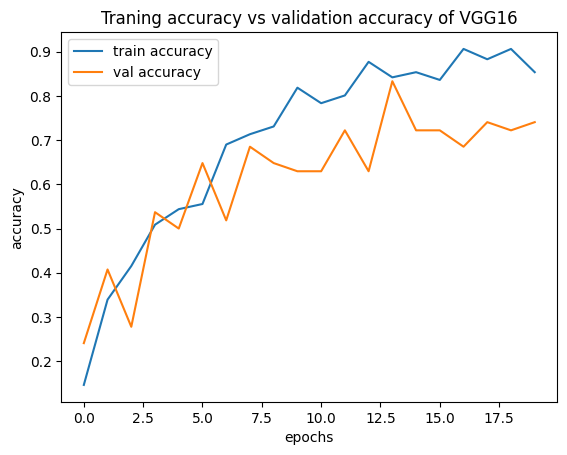

In [ ]:
plt.plot(Best.history['accuracy'], label='train accuracy')
plt.plot(Best.history['val_accuracy'], label='val accuracy')
plt.title("Traning accuracy vs validation accuracy of VGG16")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mung_Bean_Dataset/train/Aphids/22.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)
#plt.imshow(image)

(1, 224, 224, 3)


In [ ]:
# Generate predictions using the trained model on the test data
y_pred = vgg_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels)

# Print the classification report
print(report)


2/2 [==============================] - 1s 766ms/step
                          precision    recall  f1-score   support

                  Aphids       0.13      1.00      0.23         7
                Bruchids       0.00      0.00      0.00         4
    Cercospora leaf spot       0.00      0.00      0.00         4
            Charcoal rot       0.00      0.00      0.00         4
Fusarium wilt _ Root rot       0.00      0.00      0.00         5
             Halo Blight       0.00      0.00      0.00         3
          Healthy Plants       0.00      0.00      0.00         7
          Powdery Mildew       0.00      0.00      0.00         5
                Stem Fly       0.00      0.00      0.00         5
               White Fly       0.00      0.00      0.00         5
           Yellow Mosaic       0.00      0.00      0.00         5

                accuracy                           0.13        54
               macro avg       0.01      0.09      0.02        54
            weighted 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class Healthy Plants


In [ ]:
vgg_model.save("/content/drive/MyDrive/My_All_Model/vgg_model.h5")

In [ ]:
Inception_model=Sequential()
InceptionV3=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="max",
    classes=11,
    classifier_activation="softmax",
)

In [ ]:
for layer in InceptionV3.layers:
  layer.trainable=False

In [ ]:
import numpy as np
import tensorflow as tf

# Example logits and labels
logits_data = np.random.rand(5, 11)  # Assuming 5 samples with 11 classes (change this according to your data)
labels_data = np.random.randint(0, 11, (5, 1))  # Assuming 5 samples with 1 label for each sample (change this according to your data)

# Convert labels to one-hot encoding
labels_one_hot = tf.one_hot(labels_data, depth=11)  # 'depth' should match the number of classes in your problem

# Build your model and define the loss function
'''model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(224,224),  # Modify 'input_shape' according to your data
    tf.keras.layers.Dense(11)  # Adjust the number of units to match the number of classes in your problem
])'''

#loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Compile the model
#model.compile(optimizer='adam', loss=loss_function)

# Train the model with the one-hot encoded labels
#model.fit(x, labels_one_hot, batch_size=32, epochs=10)  # 'x' represents your input data, modify this according to your data


"model = tf.keras.models.Sequential([\n    tf.keras.layers.Dense(64, activation='relu', input_shape=(224,224),  # Modify 'input_shape' according to your data\n    tf.keras.layers.Dense(11)  # Adjust the number of units to match the number of classes in your problem\n])"

In [ ]:
Inception_model.add(InceptionV3)
Inception_model.add(Flatten())
Inception_model.add(Dense(553,activation="relu"))
Inception_model.add(Dense(11,activation="softmax"))

In [ ]:
Inception_model.summary()

In [ ]:
Train_gen =ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=0.4)

In [ ]:
Test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_data_gen=Train_gen.flow_from_directory(Train_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

In [ ]:
Test_data_gen=Test_gen.flow_from_directory(Test_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 54 images belonging to 11 classes.


In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'Aphids': 0, 'Bruchids': 1, 'Cercospora leaf spot': 2, 'Charcoal rot': 3, 'Fusarium wilt _ Root rot': 4, 'Halo Blight': 5, 'Healthy Plants': 6, 'Powdery Mildew': 7, 'Stem fly': 8, 'White fly': 9, 'Yellow Mosaic': 10}


In [ ]:
li = list(class_names.keys())
print(li)

['Aphids', 'Bruchids', 'Cercospora leaf spot', 'Charcoal rot', 'Fusarium wilt _ Root rot', 'Halo Blight', 'Healthy Plants', 'Powdery Mildew', 'Stem fly', 'White fly', 'Yellow Mosaic']


In [ ]:
Inception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     loss="binary_crossentropy",
                     metrics=([tf.keras.metrics.Accuracy(),
                              tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall()]))

In [ ]:
My_model=Inception_model.fit(Train_data_gen,
               epochs=20,
               verbose=1,
               validation_data=Test_data_gen)

In [ ]:
Inception_model.save("/content/drive/MyDrive/My_All_Model/InceptionV3.h5")

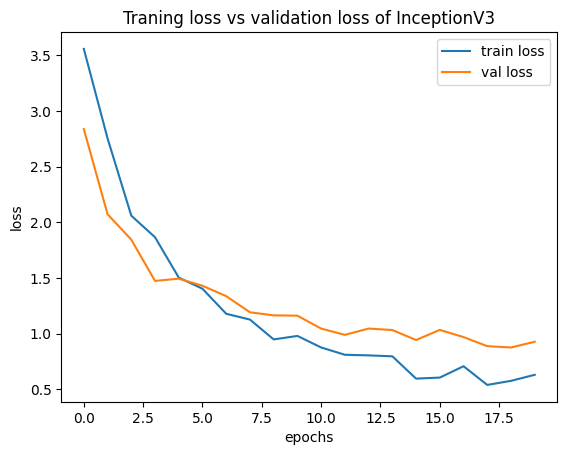

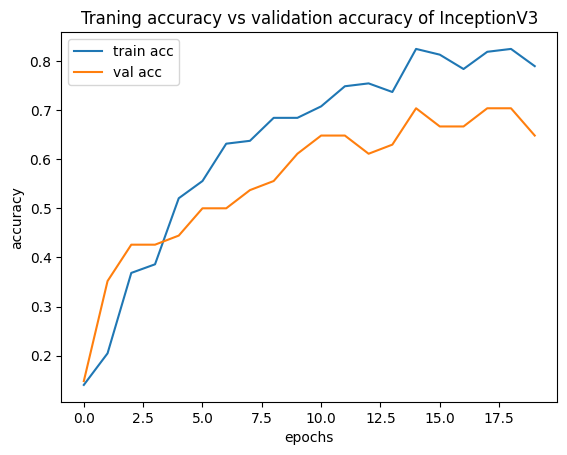

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(My_model.history['loss'], label='train loss')
plt.plot(My_model.history['val_loss'], label='val loss')
plt.title("Traning loss vs validation loss of InceptionV3")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.savefig('Loss')

# plot the accuracy
plt.plot(My_model.history['accuracy'], label='train acc')
plt.plot(My_model.history['val_accuracy'], label='val acc')
plt.title("Traning accuracy vs validation accuracy of InceptionV3")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mung_Bean_Dataset/test/Charcoal rot/3.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)
#plt.imshow(image)

(1, 224, 224, 3)


In [ ]:
pred=Inception_model.predict(Test_data_gen)
print(pred)

2/2 [==============================] - 3s 726ms/step
[[4.33919253e-03 9.86355603e-01 1.80585659e-03 4.47474374e-03
  6.43057574e-04 1.40539557e-03 1.75236310e-05 5.65940863e-04
  2.09182559e-04 1.70431973e-04 1.30958360e-05]
 [2.83069890e-02 5.04843367e-04 2.29441956e-01 1.21971127e-02
  5.32938391e-02 4.27502453e-01 1.29888549e-01 1.07159421e-01
  4.95589059e-03 2.54449178e-03 4.20457777e-03]
 [1.05758496e-02 8.75514452e-05 2.12702653e-04 6.60519898e-02
  4.70262312e-04 7.09885673e-04 3.74626443e-02 1.24493390e-02
  1.18722429e-03 8.69888425e-01 9.04132437e-04]
 [4.81152952e-01 2.95190569e-02 5.85857371e-04 1.60550967e-01
  1.57435029e-03 6.19890308e-03 1.47574663e-03 5.40607097e-03
  1.72372814e-02 2.95899302e-01 3.99545941e-04]
 [2.96648473e-01 3.93990949e-02 3.13129686e-02 4.95509267e-01
  7.47639174e-03 2.01484710e-02 4.26721433e-03 3.32298800e-02
  2.58790748e-03 6.37190938e-02 5.70116937e-03]
 [1.19525730e-03 7.67707010e-04 2.33975500e-02 4.56842873e-03
  3.76826942e-01 5.521887

2/2 [==============================] - 1s 272ms/step


<Axes: >

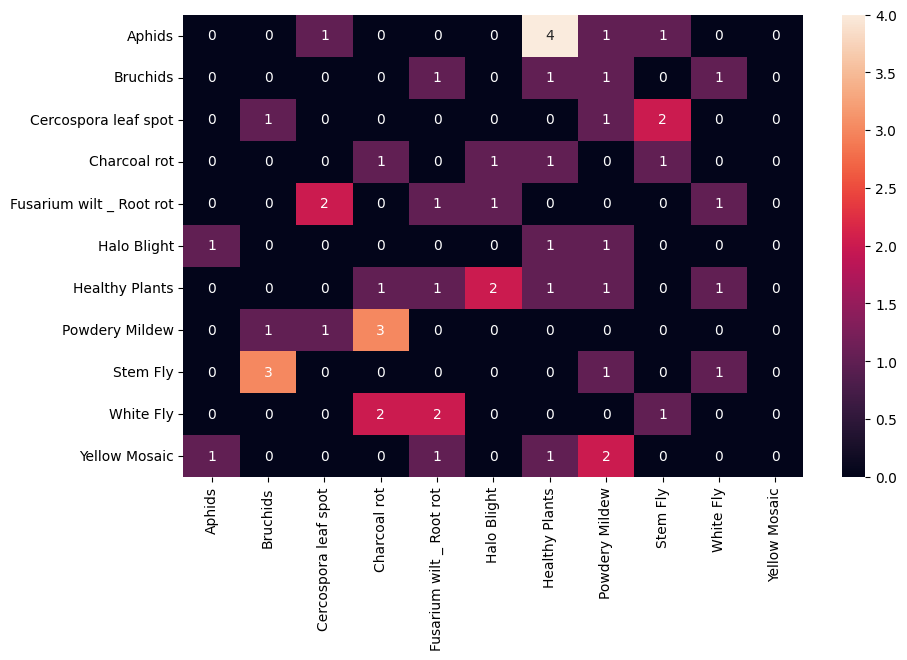

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate predictions using the trained model on the test data
y_pred = Inception_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

plt.figure(figsize=(10,6))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_true_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)


In [ ]:
output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class Charcoal rot


In [ ]:
Mobilenet_model=Sequential()
Mobilenet=tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    pooling="avg",
    classes=11,
    classifier_activation="softmax",
)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
for layer in Mobilenet.layers:
  layer.trainable=False

In [ ]:
Mobilenet_model.add(Mobilenet)
Mobilenet_model.add(Flatten())
Mobilenet_model.add(Dense(553,activation="relu"))
Mobilenet_model.add(Dense(11,activation="softmax"))

In [ ]:
Mobilenet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 553)               566825    
                                                                 
 dense_5 (Dense)             (None, 11)                6094      
                                                                 
Total params: 3,801,783
Trainable params: 572,919
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
Mobilenet_model.compile(optimizer=Adam(lr=0.0001) , loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
Train_gen =ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=0.4)

In [ ]:
Test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_data_gen=Train_gen.flow_from_directory(Train_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 171 images belonging to 11 classes.


In [ ]:
Test_data_gen=Test_gen.flow_from_directory(Test_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 54 images belonging to 11 classes.


In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'Aphids': 0, 'Bruchids': 1, 'Cercospora leaf spot': 2, 'Charcoal rot': 3, 'Fusarium wilt _ Root rot': 4, 'Halo Blight': 5, 'Healthy Plants': 6, 'Powdery Mildew': 7, 'Stem fly': 8, 'White fly': 9, 'Yellow Mosaic': 10}


In [ ]:
li = list(class_names.keys())
print(li)

['Aphids', 'Bruchids', 'Cercospora leaf spot', 'Charcoal rot', 'Fusarium wilt _ Root rot', 'Halo Blight', 'Healthy Plants', 'Powdery Mildew', 'Stem fly', 'White fly', 'Yellow Mosaic']


In [ ]:
My_model=Mobilenet_model.fit(Train_data_gen,
               epochs=20,
               verbose=1,
               validation_data=Test_data_gen)

Epoch 1/20
6/6 [==============================] - 13s 2s/step - loss: 2.7850 - accuracy: 0.0994 - val_loss: 2.4695 - val_accuracy: 0.2407
Epoch 2/20
6/6 [==============================] - 8s 1s/step - loss: 2.1924 - accuracy: 0.2924 - val_loss: 2.1636 - val_accuracy: 0.2593
Epoch 3/20
6/6 [==============================] - 10s 2s/step - loss: 1.8806 - accuracy: 0.4152 - val_loss: 1.8907 - val_accuracy: 0.3148
Epoch 4/20
6/6 [==============================] - 9s 2s/step - loss: 1.5669 - accuracy: 0.4971 - val_loss: 1.6704 - val_accuracy: 0.4074
Epoch 5/20
6/6 [==============================] - 8s 2s/step - loss: 1.3669 - accuracy: 0.6842 - val_loss: 1.5151 - val_accuracy: 0.5556
Epoch 6/20
6/6 [==============================] - 10s 2s/step - loss: 1.2154 - accuracy: 0.6550 - val_loss: 1.3916 - val_accuracy: 0.6111
Epoch 7/20
6/6 [==============================] - 10s 2s/step - loss: 1.0676 - accuracy: 0.7135 - val_loss: 1.2749 - val_accuracy: 0.7037
Epoch 8/20
6/6 [=====================

In [ ]:
Mobilenet_model.save("/content/drive/MyDrive/My_All_Model/Mobilenet_model.h5")

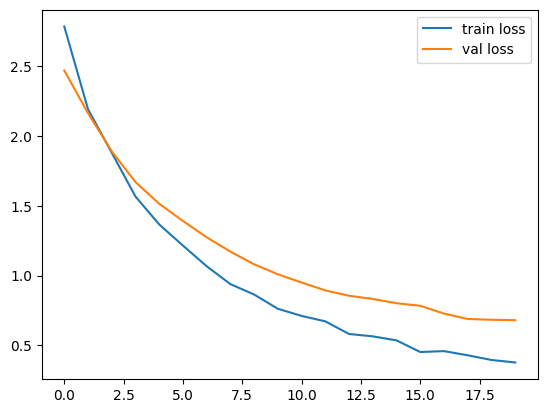

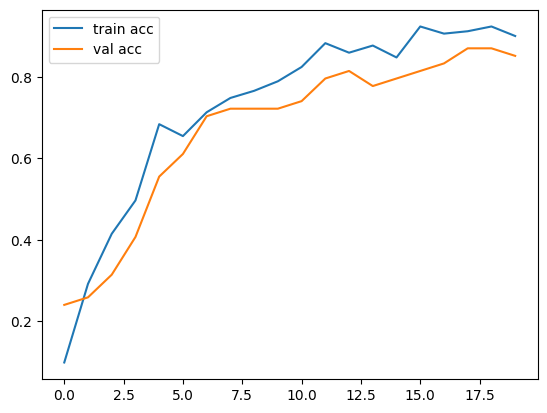

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(My_model.history['loss'], label='train loss')
plt.plot(My_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('Loss')

# plot the accuracy
plt.plot(My_model.history['accuracy'], label='train acc')
plt.plot(My_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mung_Bean_Dataset/train/Halo Blight/3.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)
#plt.imshow(image)

(1, 224, 224, 3)


In [ ]:
pred=Mobilenet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.15103205 0.03352132 0.08828119 0.01038599 0.09081638 0.20726165
  0.0166204  0.02280868 0.0484888  0.16294265 0.16784087]]


2/2 [==============================] - 1s 418ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Aphids'),
  Text(0, 1, 'Bruchids'),
  Text(0, 2, 'Cercospora leaf spot'),
  Text(0, 3, 'Charcoal rot'),
  Text(0, 4, 'Fusarium wilt _ Root rot'),
  Text(0, 5, 'Halo Blight'),
  Text(0, 6, 'Healthy Plants'),
  Text(0, 7, 'Powdery Mildew'),
  Text(0, 8, 'Stem Fly'),
  Text(0, 9, 'White Fly'),
  Text(0, 10, 'Yellow Mosaic')])

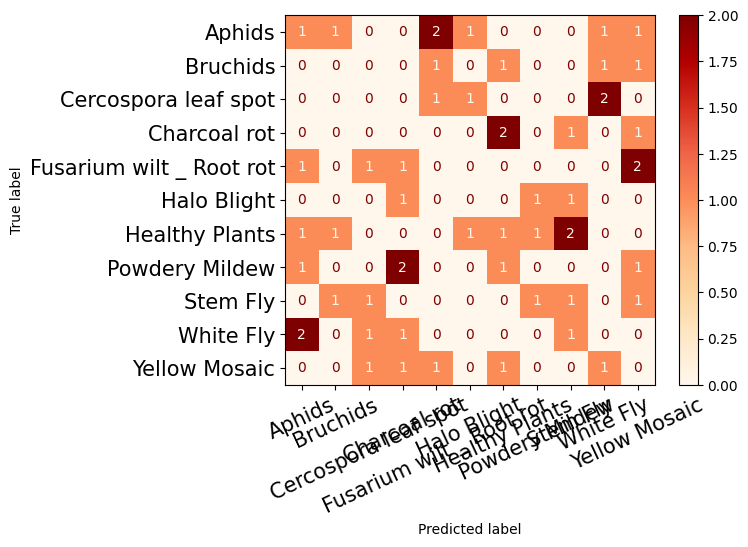

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Generate predictions using the trained model on the test data
y_pred = Mobilenet_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_true_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
print(y_pred)

In [ ]:

output_class=li[np.argmax(pred)]
print("the predict class is output class", output_class)

the predict class is output class Halo Blight


In [ ]:
MobilenetV2_model = Sequential()
MobilenetV2=tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    alpha=1.0,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling="avg",
    classes=11,
    classifier_activation="softmax"
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in MobilenetV2.layers:
  layer.trainable=False

In [ ]:
MobilenetV2_model.add(MobilenetV2)
MobilenetV2_model.add(Flatten())
MobilenetV2_model.add(Dense(553,activation="relu"))
MobilenetV2_model.add(Dense(11,activation="softmax"))

In [ ]:
MobilenetV2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_9 (Dense)             (None, 553)               708393    
                                                                 
 dense_10 (Dense)            (None, 11)                6094      
                                                                 
Total params: 2,972,471
Trainable params: 714,487
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
MobilenetV2_model.compile(optimizer=Adam(lr=0.0001) , loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
Train_gen =ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=0.4)

In [ ]:
Test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
Train_data_gen=Train_gen.flow_from_directory(Train_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 171 images belonging to 11 classes.


In [ ]:
Test_data_gen=Test_gen.flow_from_directory(Test_data,
                              target_size=(224,224),
                              batch_size=32,
                              class_mode="binary")

Found 54 images belonging to 11 classes.


In [ ]:
class_names=Train_data_gen.class_indices
print(class_names)

{'Aphids': 0, 'Bruchids': 1, 'Cercospora leaf spot': 2, 'Charcoal rot': 3, 'Fusarium wilt _ Root rot': 4, 'Halo Blight': 5, 'Healthy Plants': 6, 'Powdery Mildew': 7, 'Stem fly': 8, 'White fly': 9, 'Yellow Mosaic': 10}


In [ ]:
li = list(class_names.keys())
print(li)

['Aphids', 'Bruchids', 'Cercospora leaf spot', 'Charcoal rot', 'Fusarium wilt _ Root rot', 'Halo Blight', 'Healthy Plants', 'Powdery Mildew', 'Stem fly', 'White fly', 'Yellow Mosaic']


In [ ]:
My_model=MobilenetV2_model.fit(Train_data_gen,
               epochs=20,
               verbose=1,
               validation_data=Test_data_gen)

Epoch 1/20
6/6 [==============================] - 16s 2s/step - loss: 2.2914 - accuracy: 0.2164 - val_loss: 2.1049 - val_accuracy: 0.2222
Epoch 2/20
6/6 [==============================] - 10s 2s/step - loss: 1.8988 - accuracy: 0.3801 - val_loss: 1.8349 - val_accuracy: 0.3704
Epoch 3/20
6/6 [==============================] - 9s 1s/step - loss: 1.6310 - accuracy: 0.4327 - val_loss: 1.5976 - val_accuracy: 0.5370
Epoch 4/20
6/6 [==============================] - 8s 1s/step - loss: 1.3913 - accuracy: 0.5731 - val_loss: 1.3980 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 10s 2s/step - loss: 1.1872 - accuracy: 0.7076 - val_loss: 1.2422 - val_accuracy: 0.7407
Epoch 6/20
6/6 [==============================] - 9s 2s/step - loss: 1.0240 - accuracy: 0.7368 - val_loss: 1.0917 - val_accuracy: 0.7593
Epoch 7/20
6/6 [==============================] - 8s 1s/step - loss: 0.8844 - accuracy: 0.7953 - val_loss: 0.9739 - val_accuracy: 0.7778
Epoch 8/20
6/6 [======================

In [ ]:
MobilenetV2_model.save("/content/drive/MyDrive/My_All_Model/MobilenetV2_model.h5")

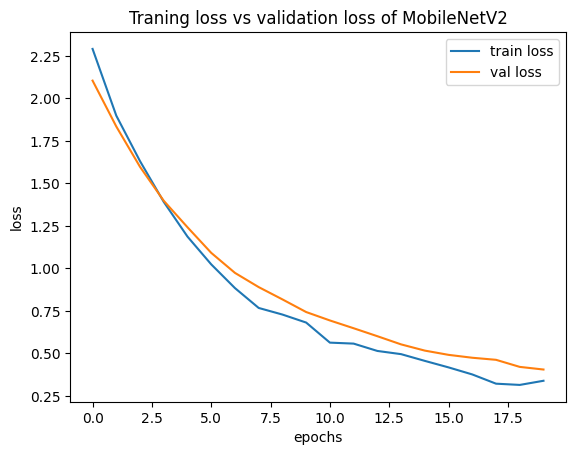

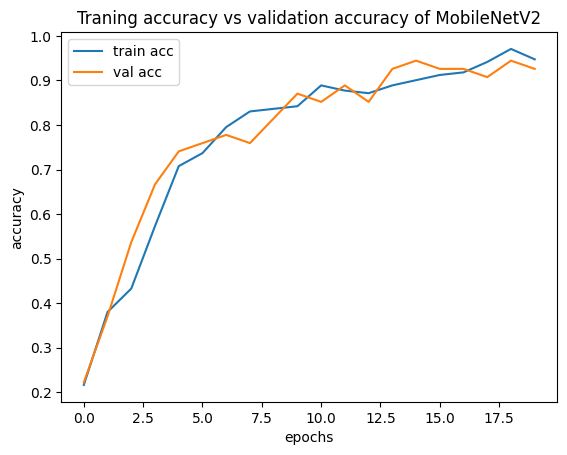

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(My_model.history['loss'], label='train loss')
plt.plot(My_model.history['val_loss'], label='val loss')
plt.title("Traning loss vs validation loss of MobileNetV2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.savefig('Loss')

# plot the accuracy
plt.plot(My_model.history['accuracy'], label='train acc')
plt.plot(My_model.history['val_accuracy'], label='val acc')
plt.title("Traning accuracy vs validation accuracy of MobileNetV2")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.savefig('Accuracy')

In [ ]:
import cv2
image=cv2.imread("/content/drive/MyDrive/Mung_Bean_Dataset/train/Halo Blight/3.jpg")
image_resize=cv2.resize(image,(224,224))
image=np.expand_dims(image_resize,axis=0)
print(image.shape)
#plt.imshow(image)

(1, 224, 224, 3)


2/2 [==============================] - 2s 662ms/step


<Axes: >

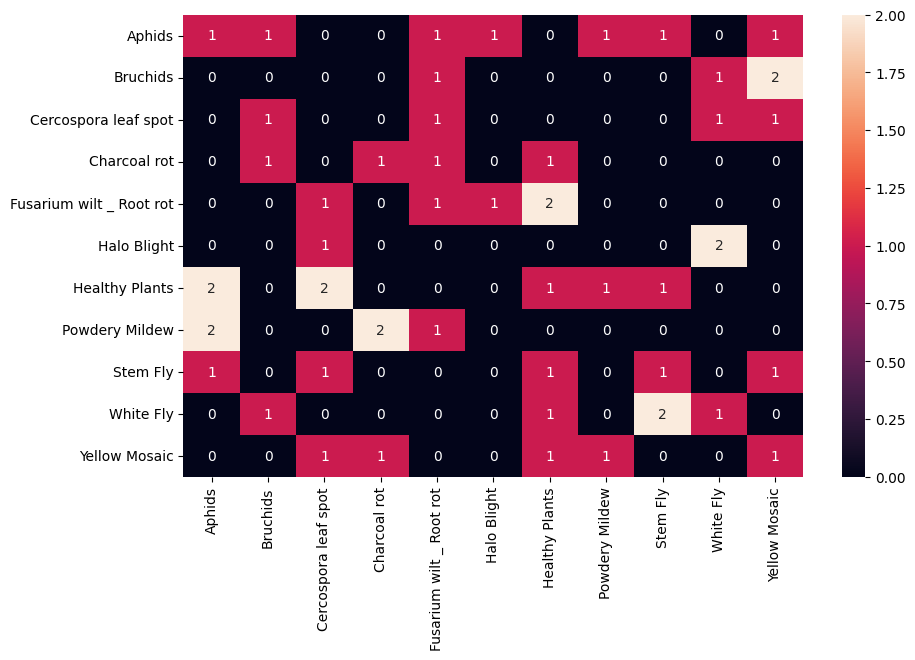

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Generate predictions using the trained model on the test data
y_pred = MobilenetV2_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

plt.figure(figsize=(10,6))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_true_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
y_pred = MobilenetV2_model.predict(Test_data_gen)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true_labels = Test_data_gen.classes

# Get the class labels
class_labels = list(Test_data_gen.class_indices.keys())

# Compute the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=class_labels,zero_division=1)

# Print the classification report
print(report)


2/2 [==============================] - 1s 326ms/step
                          precision    recall  f1-score   support

                  Aphids       0.00      0.00      0.00         7
                Bruchids       0.50      0.50      0.50         4
    Cercospora leaf spot       0.00      0.00      0.00         4
            Charcoal rot       0.00      0.00      0.00         4
Fusarium wilt _ Root rot       0.00      0.00      0.00         5
             Halo Blight       0.00      0.00      0.00         3
          Healthy Plants       0.14      0.14      0.14         7
          Powdery Mildew       0.00      0.00      0.00         5
                Stem Fly       0.20      0.20      0.20         5
               White Fly       0.20      0.20      0.20         5
           Yellow Mosaic       0.00      0.00      0.00         5

                accuracy                           0.09        54
               macro avg       0.09      0.09      0.09        54
            weighted 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the pre-trained layers so they won't be trained during fine-tuning
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)  # 'num_classes' is the number of classes in your dataset

# Step 4: Create the transfer learning model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Load and preprocess your custom dataset
# Here, you can use ImageDataGenerator to preprocess your images and feed them to the model during training
# Make sure to organize your data into train, validation, and test sets in separate directories.
# Example:
train_dir = '/content/drive/MyDrive/Mung_Bean_Dataset/train'
#valid_dir = 'path/to/validation_directory'
test_dir = '/content/drive/MyDrive/Mung_Bean_Dataset/test'

# Example ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Example ImageDataGenerator for validation and test data
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Specify the batch size and target size
batch_size = 6
target_size = (224, 224)

# Create data generators for training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

'''valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)'''

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Step 7: Train the model on your custom dataset
# The number of steps per epoch and validation steps depend on your dataset size.
# Adjust them accordingly to cover all samples in your dataset during training.
num_epochs = 30
num_train_samples = len(train_generator.filenames)
num_valid_samples = len(test_generator.filenames)

model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=num_valid_samples // batch_size
)

# Step 8: Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


Found 171 images belonging to 11 classes.
Found 54 images belonging to 11 classes.
Epoch 1/30
28/28 [==============================] - 12s 373ms/step - loss: 2.4080 - accuracy: 0.1455 - val_loss: 2.3175 - val_accuracy: 0.1852
Epoch 2/30
28/28 [==============================] - 10s 368ms/step - loss: 2.2108 - accuracy: 0.2121 - val_loss: 2.2342 - val_accuracy: 0.2037
Epoch 3/30
28/28 [==============================] - 10s 364ms/step - loss: 2.1224 - accuracy: 0.2848 - val_loss: 2.1162 - val_accuracy: 0.2778
Epoch 4/30
28/28 [==============================] - 10s 350ms/step - loss: 2.0092 - accuracy: 0.3571 - val_loss: 2.0367 - val_accuracy: 0.3889
Epoch 5/30
28/28 [==============================] - 9s 316ms/step - loss: 1.9112 - accuracy: 0.4000 - val_loss: 1.9674 - val_accuracy: 0.3704
Epoch 6/30
28/28 [==============================] - 10s 364ms/step - loss: 1.8451 - accuracy: 0.4424 - val_loss: 1.8653 - val_accuracy: 0.4259
Epoch 7/30
28/28 [==============================] - 10s 359m

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you already have your 'model', 'test_generator', and 'num_classes' defined from the previous code.

# Step 8: Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Step 9: Make predictions on the test set
test_steps = len(test_generator)
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator, steps=test_steps)  # Predicted probabilities

# Step 10: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 11: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 12: Compute classification report (includes precision, recall, and F1-score)
class_labels = [f"Class {i}" for i in range(11)]  # Replace this with actual class labels if you have them
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)


9/9 [==============================] - 2s 147ms/step - loss: 0.9763 - accuracy: 0.7037
Test loss: 0.9763085246086121
Test accuracy: 0.7037037014961243
9/9 [==============================] - 1s 156ms/step
Confusion Matrix:
[[1 0 0 0 1 0 3 0 0 2 0]
 [2 0 0 0 0 0 0 1 0 1 0]
 [0 1 0 1 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 0 0 1 0 1]
 [0 0 1 1 1 0 0 1 1 0 0]
 [0 0 0 0 1 0 1 0 0 1 0]
 [0 0 1 0 1 0 2 1 0 1 1]
 [1 0 2 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 3 1]
 [2 0 0 1 1 0 0 0 1 0 0]
 [0 0 1 0 2 0 2 0 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.17      0.14      0.15         7
     Class 1       0.00      0.00      0.00         4
     Class 2       0.00      0.00      0.00         4
     Class 3       0.00      0.00      0.00         4
     Class 4       0.11      0.20      0.14         5
     Class 5       0.00      0.00      0.00         3
     Class 6       0.20      0.29      0.24         7
     Class 7       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
